<a href="https://colab.research.google.com/github/pranav-deo-op/HW11/blob/main/hw11_using_db10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import urllib.request
import tarfile
import os

# Define the URL of the tar file
tar_url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

# Download and extract the tar file
with urllib.request.urlopen(tar_url) as response:
  with tarfile.open(fileobj=response, mode="r|gz") as tar:
    tar.extractall()

# Convert the dataset to a DataFrame
data = {'review': [], 'sentiment': []}

# Iterate through the dataset directory
for sentiment in ['pos', 'neg']:
  directory = f"aclImdb/train/{sentiment}"
  for filename in os.listdir(directory):
    with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
      review = file.read()
      data['review'].append(review)
      data['sentiment'].append(sentiment)

hw11_using_db10_data = pd.DataFrame(data)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# Define the English stopwords list
stop_words = set(stopwords.words('english'))

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    # Convert to lower case
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    word_tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    text = [lemmatizer.lemmatize(word) for word in word_tokens if word not in stop_words]
    return text

# Preprocess the review column
hw11_using_db10_data['preprocessed_review'] = hw11_using_db10_data['review'].apply(preprocess_text)

hw11_using_db10_data.head()

,review,sentiment,preprocessed_review
0,What a fun b-movie! Shepis is absolutely beaut...,pos,"[fun, bmovie, shepis, absolutely, beautiful, s..."
1,Doghi is a wonderful movie and Renuka Daftarda...,pos,"[doghi, wonderful, movie, renuka, daftardar, e..."
2,This is what I was expecting when star trek DS...,pos,"[expecting, star, trek, ds9, premiered, slight..."
3,Saw it as many times as I could before it left...,pos,"[saw, many, time, could, left, scene, delightf..."
4,Why should you watch this? There are certainly...,pos,"[watch, certainly, reason, shouldnt, watch, su..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Join the preprocessed text back into a string
hw11_using_db10_data['preprocessed_review_str'] = hw11_using_db10_data['preprocessed_review'].apply(' '.join)

# Define the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)

# Apply the vectorizer
tfidf = vectorizer.fit_transform(hw11_using_db10_data['preprocessed_review_str'])

# Define the LDA model
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50., random_state=0)

# Fit the LDA model
lda.fit(tfidf)

# Function to display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)] = ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)] = ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

# Get the feature names (words)
tf_feature_names = vectorizer.get_feature_names_out()

# Display the top 10 words in each topic
display_topics(lda, tf_feature_names, 10)


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,film,0.1,son,0.1,movie,1617.4,br,997.6,musical,62.3,disney,87.2,jane,64.8,rock,0.1,cartoon,59.2,italian,0.1
1,excellent,0.1,father,0.1,br,1287.7,film,950.4,dance,52.0,animation,22.3,version,15.7,film,0.1,tom,37.5,novel,0.1
2,movie,0.1,relationship,0.1,film,909.5,movie,607.5,dancing,45.6,animated,0.1,adaptation,3.2,high,0.1,cat,25.5,version,0.1
3,show,0.1,family,0.1,bad,654.3,one,490.7,song,40.9,movie,0.1,novel,0.1,western,0.1,catch,0.1,de,0.1
4,great,0.1,movie,0.1,like,652.8,story,378.9,number,31.4,beauty,0.1,scott,0.1,br,0.1,dog,0.1,film,0.1
5,love,0.1,mother,0.1,one,640.7,character,371.5,singing,27.8,sequel,0.1,plain,0.1,school,0.1,short,0.1,picture,0.1
6,people,0.1,well,0.1,good,523.6,like,338.6,music,6.7,king,0.1,read,0.1,music,0.1,animation,0.1,brother,0.1
7,performance,0.1,human,0.1,even,499.4,time,315.6,voice,2.7,cartoon,0.1,book,0.1,movie,0.1,york,0.1,br,0.1
8,hot,0.1,michael,0.1,really,490.6,good,296.9,sequence,1.2,musical,0.1,english,0.1,story,0.1,familiar,0.1,also,0.1
9,life,0.1,acted,0.1,time,475.6,life,285.8,wonderful,0.1,spirit,0.1,mr,0.1,well,0.1,violent,0.1,story,0.1


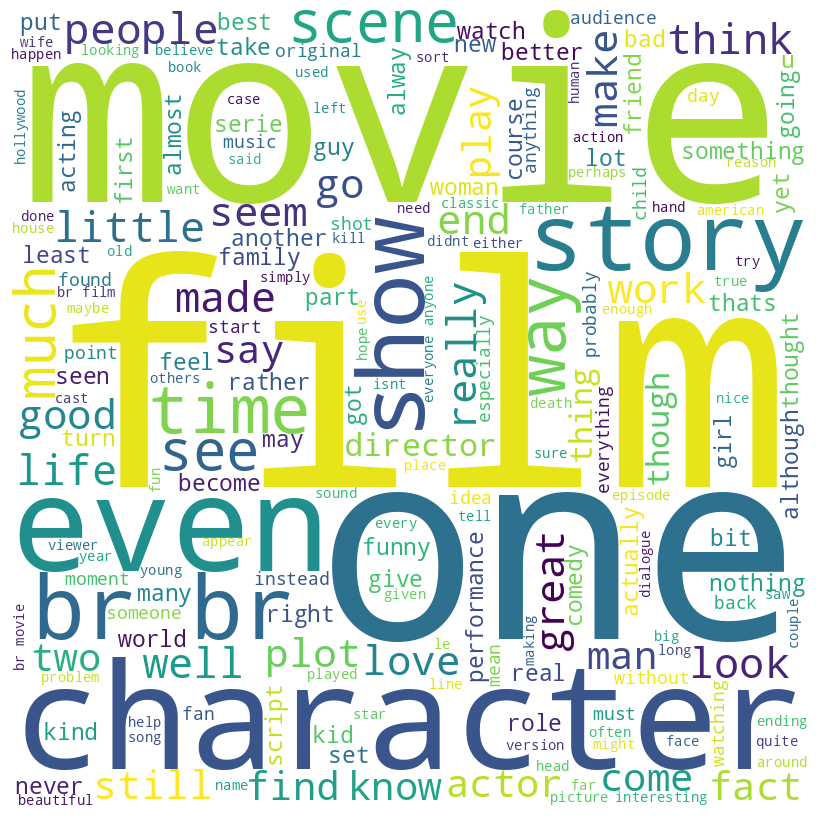

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a string of words
text = ' '.join([' '.join(words) for words in hw11_using_db10_data['preprocessed_review']])

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(text)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()